In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sympy import Point, Line

In [15]:
%config IPCompleter.greedy=True

In [16]:
df = pd.read_csv('~/MasterThesis/Data/iris.csv')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [18]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])
df=df.iloc[:,0:4]
scaler = StandardScaler()
df= scaler.fit_transform(df)
df

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [19]:
sample = df

**Elbow Implimentation with distance measure as Cosine**

In [32]:
distortion_euclidean=[]
slope=[]
K = range(1,10)
for k in K :
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit_predict(sample)
    #Calculate pairwise distance between centers and each sample and then finding minnimum of that
    distortion_euclidean.append(sum(np.max(cdist(sample,kmeansModel.cluster_centers_,'cosine'),axis=1)))
    #Calculate slope of each line
    if k>1:
        s= (distortion_euclidean[-1]-distortion_euclidean[-2])
        slope.append([k,s])

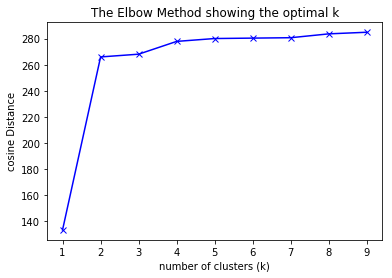

In [33]:
plt.plot(K,distortion_euclidean,'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('cosine Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [34]:
distortion_euclidean

[133.48828985161214,
 265.92704011513956,
 268.04149454329695,
 277.82829197061625,
 280.0240725439069,
 280.3404744497211,
 280.65104589271607,
 283.60111145355086,
 284.83506506260795]

In [35]:
slope

[[2, 132.43875026352742],
 [3, 2.114454428157387],
 [4, 9.7867974273193],
 [5, 2.1957805732906763],
 [6, 0.3164019058141889],
 [7, 0.31057144299495576],
 [8, 2.950065560834787],
 [9, 1.233953609057096]]

In [37]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 2
Optimal Number of Clusters = 6


In [38]:
distances=[]
for i in range(0,9):
    p1=Point(1,distortion_euclidean[0])
    p2=Point(9,distortion_euclidean[8])
    l1 = Line(p1,p2)
    p=Point(i+1,distortion_euclidean[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+1))

Optimal number 0f clusters = 2
